In [4]:
# Author : Baptiste PICARD
# email : picard.baptiste@laposte.net
# First implementation : 23/03/20220
# Last Changes : 
# Version : 
# Abstract : Short implementation of an Multi Layer Perceptron.
# Links to pages i used : 
#    - https://github.com/trekhleb/homemade-machine-learning/tree/master/homemade/neural_network

# Import for the project 
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt 

# Handle warnings
warnings.filterwarnings('ignore')

In [47]:
class MultiLayerPerceptron :
    """
        I'm gonna create a multi layer perceptron and train it by my own.
        This MLP will be composed by .
    """
    # Init
    def __init__(self, name, n_entries, n_hiddens, n_outputs) : 
        self.name = name # Name of the MLP
        self.n_entries = n_entries # Neurons which composed the input layer
        self.n_hiddens = n_hiddens # Neurons which composed the hidden layer
        self.n_outputs = n_outputs # Neurons which composed the output layer
        self.layers = [n_entries, n_hiddens, n_outputs]
        self.values = None
        self.weights = None
        self.createMLP()
        if(self.getValues() == None or self.getWeights() == 0) :
            print("Error")
        
    # Getter
    def getValues(self) :
        return self.values
    
    def getWeights(self) :
        return self.weights
    
    # Setter
    def setValues(self, new_values) :
        self.values = new_values
        
    def setWeights(self, new_weights) :
        self.weights = new_weights
        
    # Function
    def createMLP(self) :
        values = np.array([np.arange(self.n_entries),np.arange(self.n_hiddens),np.arange(self.n_outputs)])
        self.setValues(values)
        weights = []
        for index_layer, layer in enumerate(self.layers) :
            if(index_layer < len(self.layers) - 1) :
                neuron_layer = []
                for neuron in range (layer) :
                    neuron_layer.append(np.arange(self.layers[index_layer+1]))
                weights.append(np.array(neuron_layer))
        weights = np.array(weights)
        self.setWeights(weights)
            
    
    def showModel(self) :
        patches = []
        text = []
        x = 0.0
        for index_layer, layer in enumerate(self.getValues()) :
            y = 0.0
            patches_layer = []
            text_layer = []
            for index_neuron, neuron in enumerate(layer) : 
                patch = plt.Circle((x,y), radius=0.3, color='g', fill=False)
                patches_layer.append(patch)
                txt = {'x' : x, 'y' : y, 'index_layer' : index_layer, 'index_neuron' : index_neuron, 'neuron' : str(neuron)}
                text_layer.append(txt)
                y+=1.0
            x +=3
            patches.append(patches_layer)
            text.append(text_layer)
            
        lines = []
        for index_layer, layer in enumerate(self.getWeights()) :
            start_x, start_y = None, None
            end_x, end_y = None, None
            for index_start, start_neuron in enumerate(layer) : 
                for index_end, end_neuron in enumerate(start_neuron) :
                    for item_layer in text :
                        for item in item_layer :
                            if(start_x!=None and start_y!=None and end_x!=None and end_y!=None) :
                                l = [start_x, start_y, end_x, end_y]
                                if(l not in lines) :
                                    lines.append(l)
                            else :
                                if(item['index_layer'] == index_layer) :
                                    if(item['index_neuron'] == index_start) :
                                        start_x, start_y = item['x'], item['y']
                                    elif(item['index_neuron'] == index_end) :
                                        end_x, end_y = item['x'], item['y']
                            
        print(lines)
        plt.figure(figsize=(50,28))
        plt.title("Test")
        plt.subplot(121)
        ax=plt.gca()
        for layer in patches :
            for patch in layer : 
                ax.add_patch(patch)
        for layer in text :
            for txt in layer :
                ax.text(txt['x'],txt['y'],txt['neuron'])
        plt.axis('scaled')
        plt.show()

In [48]:
my_model = MultiLayerPerceptron("MLP01", 3, 4, 1)

[[0.0, 0.0, 0.0, 1.0], [3.0, 0.0, 3.0, 0.0]]


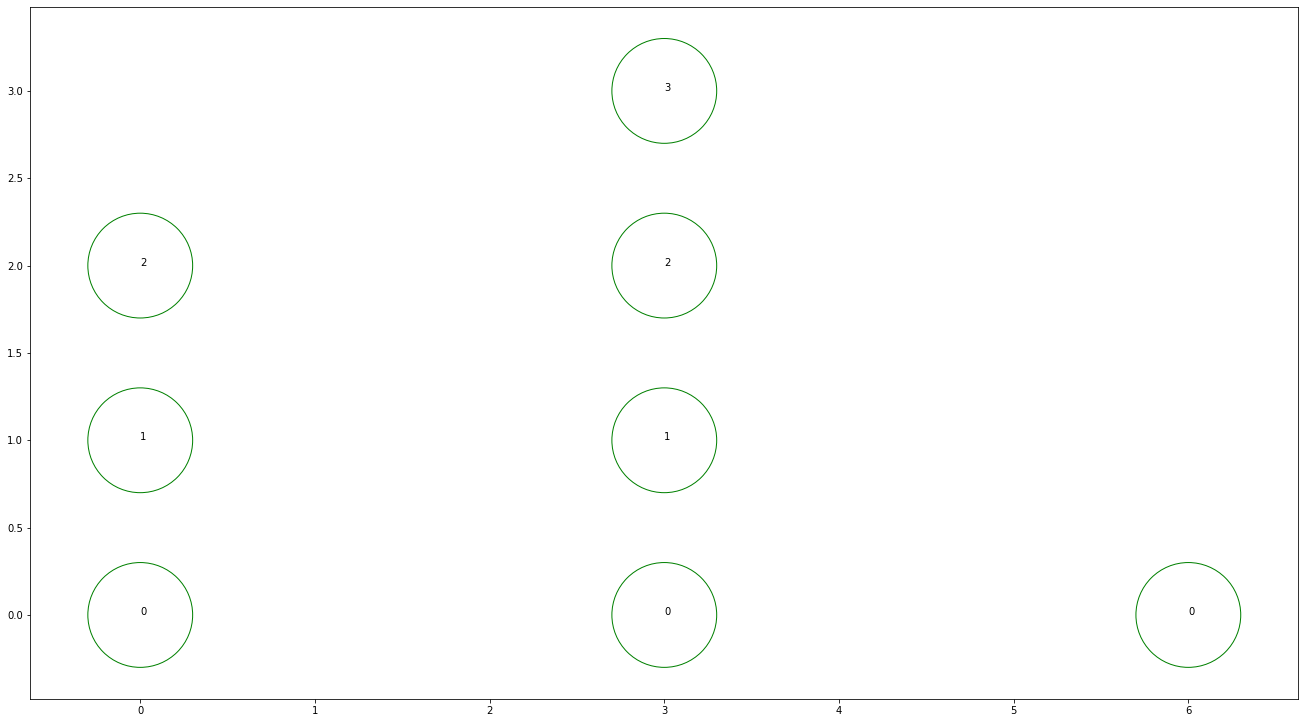

In [49]:
my_model.showModel()